In [2]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, isdir, join, exists

In [3]:
plt.rcParams['figure.figsize'] = [10,5]
plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['font.size'] = 14

In [4]:
datasetpath = '../../src/datasets/'
data = [ f for f in listdir(datasetpath) if isdir(join(datasetpath, f))] 
data
#filename = '../../src/datasets/EmailEUCore/EmailEUCore.csv'

['Emailcontacts',
 'EmailURV',
 'EmailEUCore',
 'POK',
 'AdultIMDB',
 'LesMiserables']

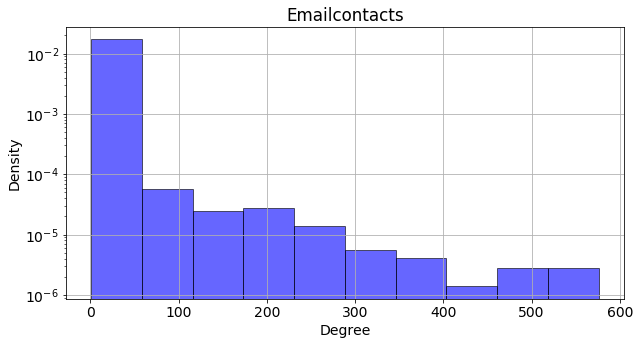

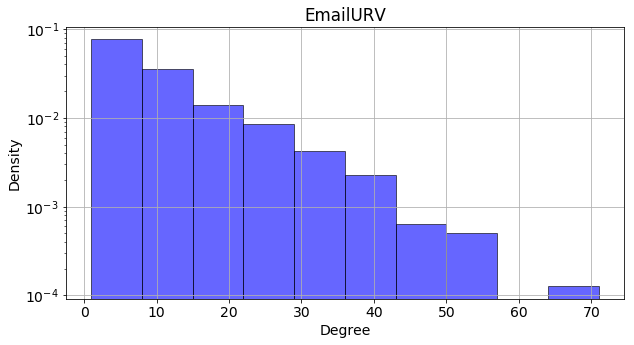

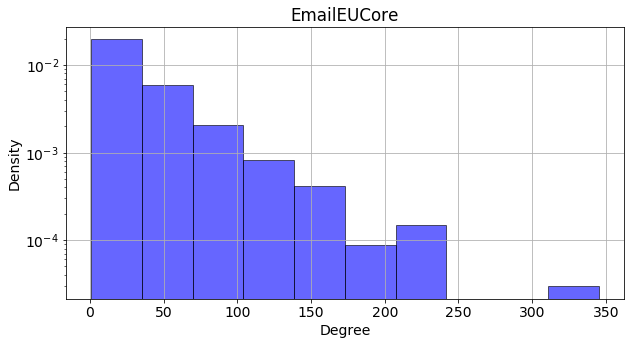

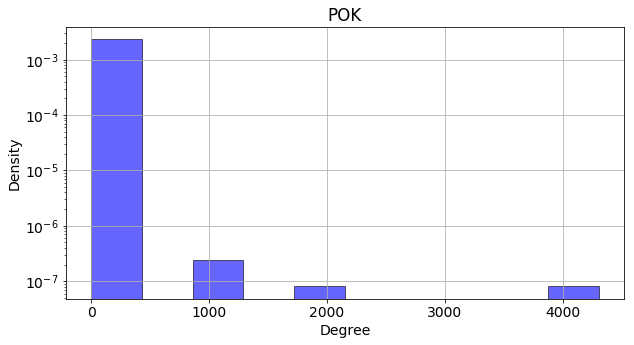

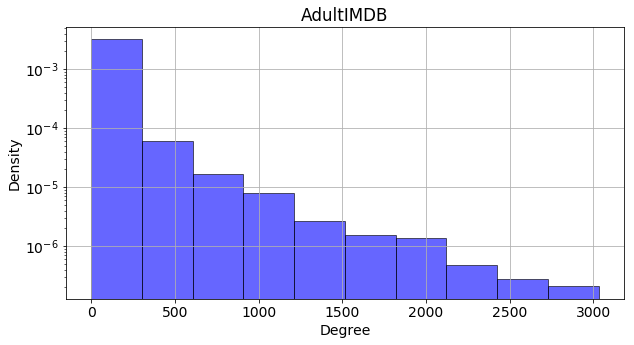

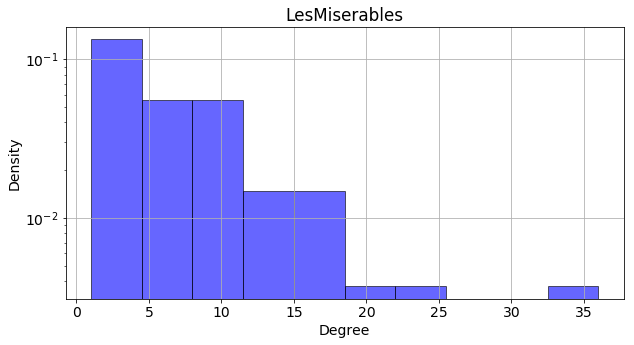

In [7]:
for dataset in data:
    G = nx.Graph()
    with open(join(datasetpath,dataset,dataset+'.csv'), 'r') as file:
        reader = csv.reader(file, delimiter=",")
        for row in reader:
            G.add_edge(int(row[0]), int(row[1]))

    degrees = [G.degree(n) for n in G.nodes()]
    n_bins = 10
    plt.figure()
    plt.grid()
    n, bins, patches = plt.hist(degrees, n_bins, density=1, facecolor='blue', alpha=0.6)
    #plt.plot(n, bins)
    plt.title(dataset)
    plt.xlabel('Degree')
    plt.ylabel('Density')
    plt.yscale('log', nonposy='clip')
    plt.savefig(join('/home/nik/Documents/masterthesis/img/pdf',dataset+'DegreeDist.pdf'))
    plt.show()


###### 